#Detecting and extracting secret code


Mounted at /content/drive


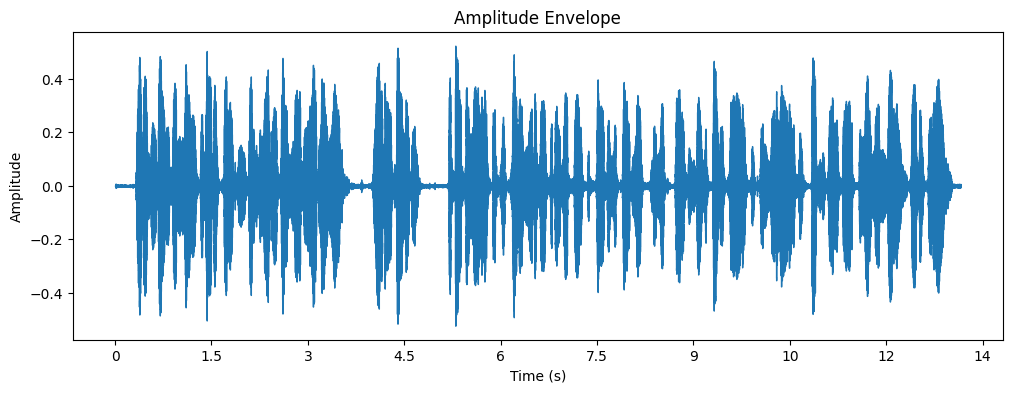

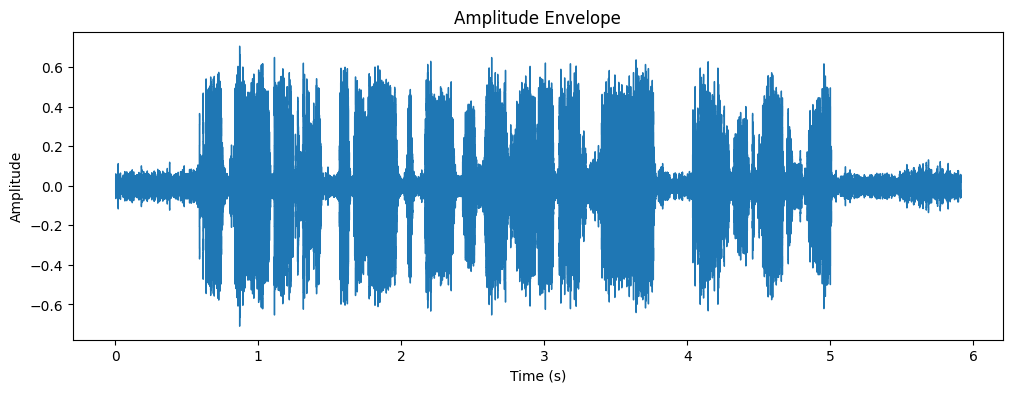

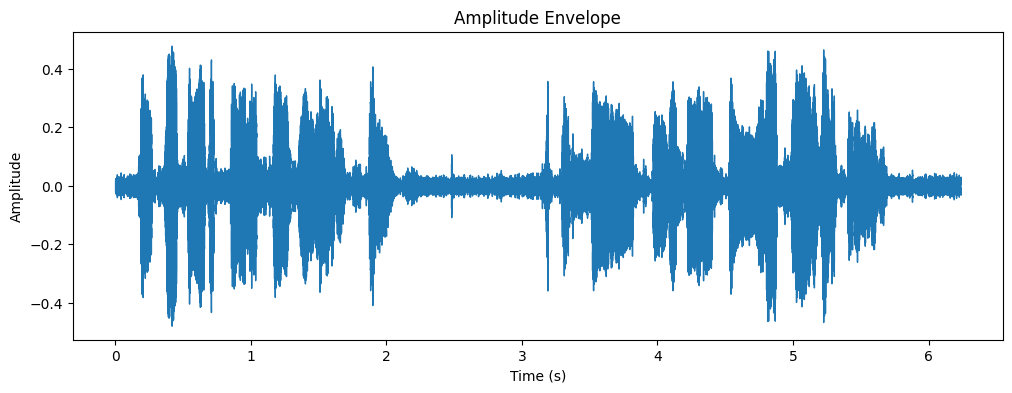

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import IPython.display as ipd
from scipy.signal import spectrogram
from scipy.signal import hilbert
import IPython.display as ipd
from scipy.signal import butter, lfilter
import scipy.signal


# Mount Google Drive
drive.mount('/content/drive')

def plot_amplitude(file_path):
    y, sr = librosa.load(file_path)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Amplitude Envelope')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

audio_file1 = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound2.wav'
audio_file2 = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound3.wav'
audio_file3 = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav'

plot_amplitude(audio_file1)
plot_amplitude(audio_file2)
plot_amplitude(audio_file3)

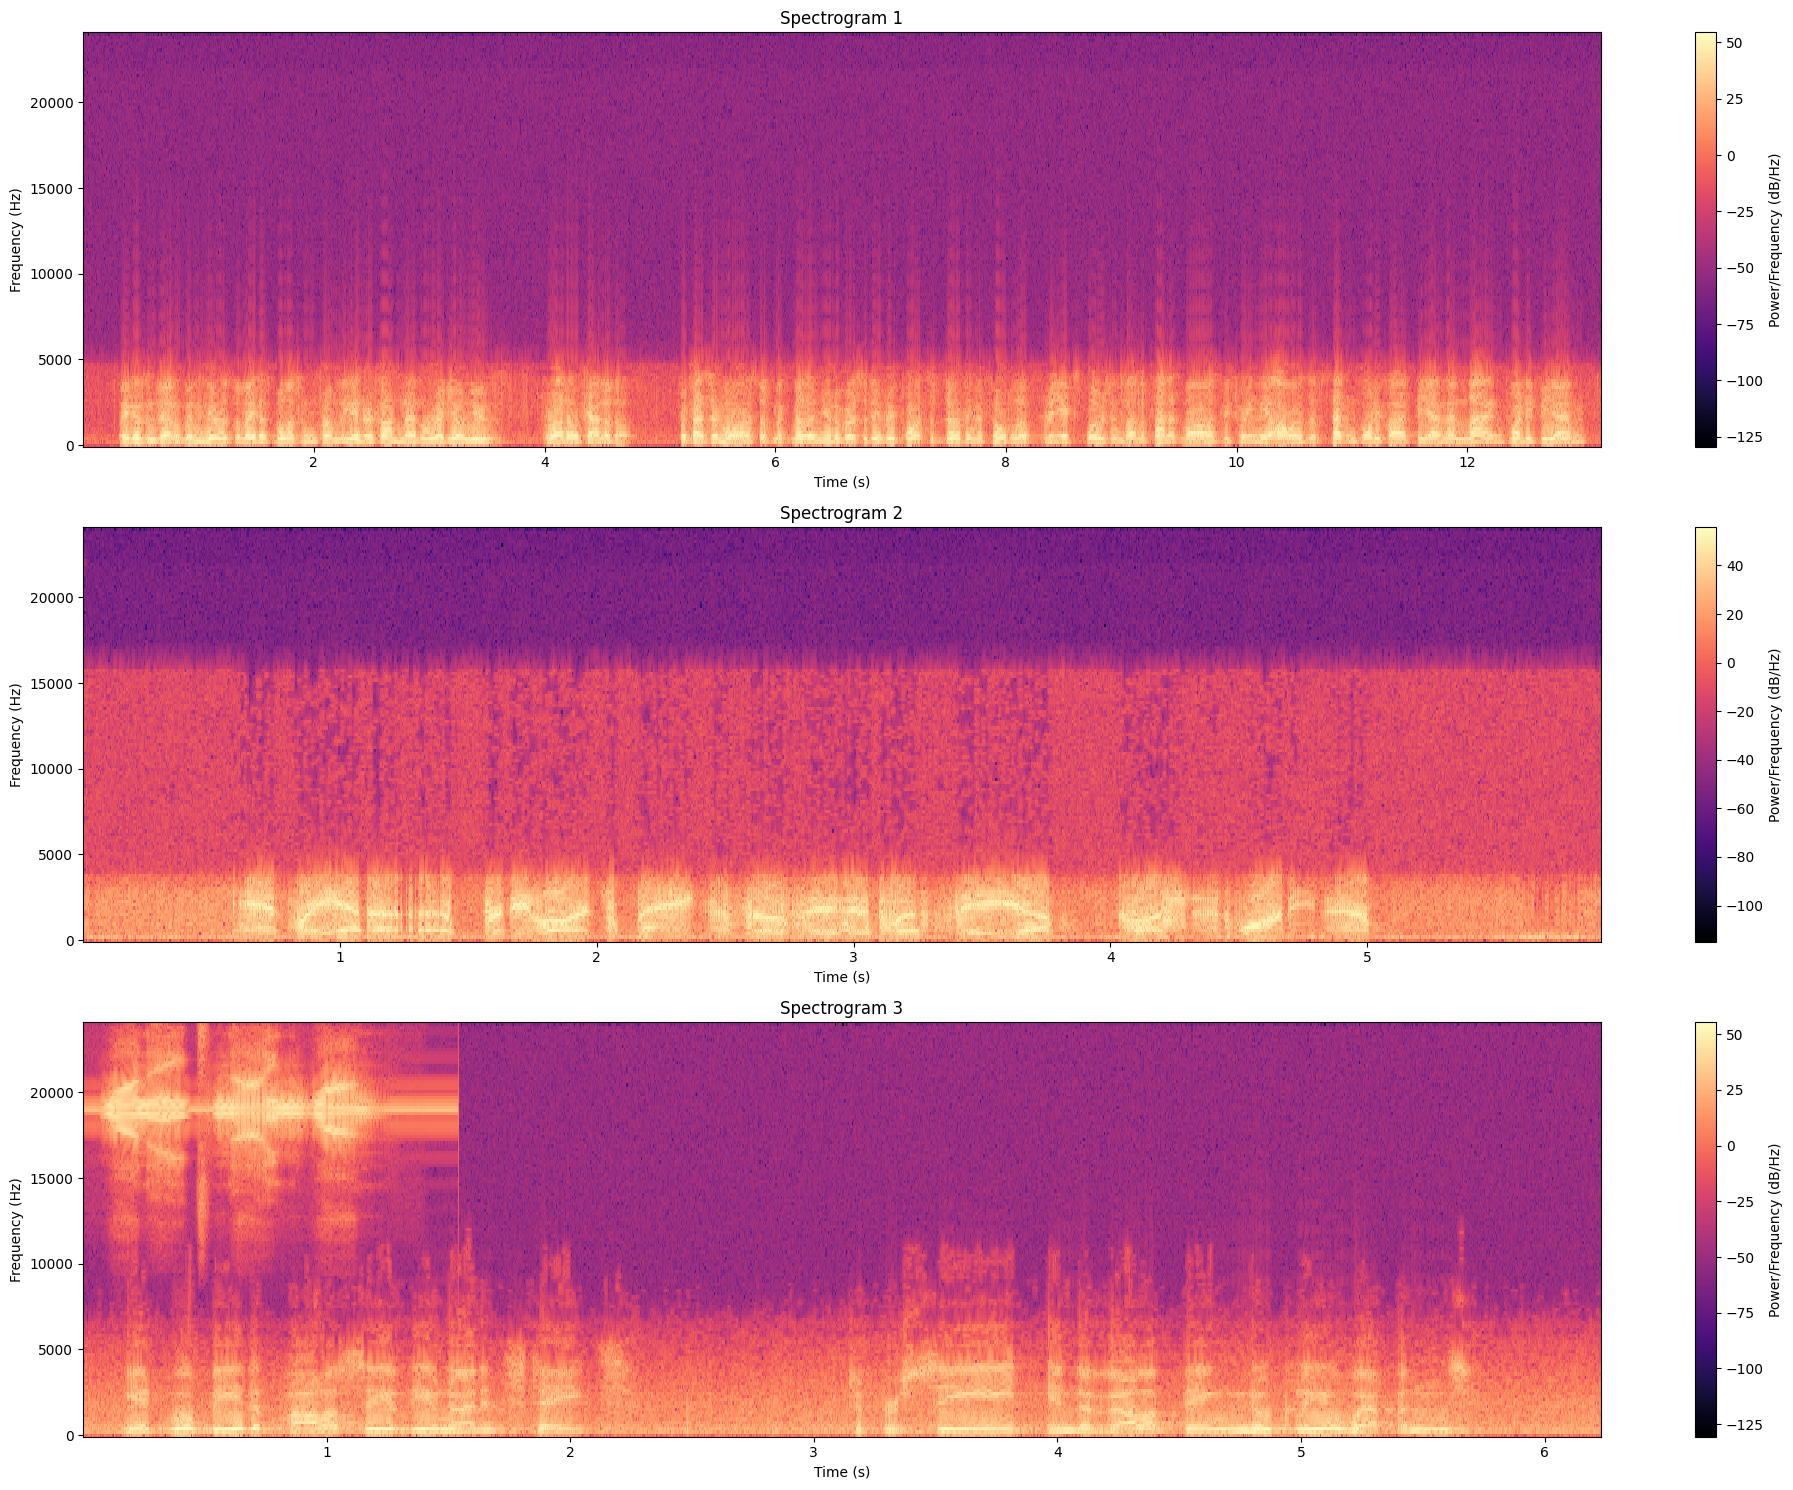

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy.signal import hilbert

audio_files = [
    '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound2.wav',
    '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound3.wav',
    '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav'
]

num_files = len(audio_files)

plt.figure(figsize=(20, 5 * num_files))

for i, file_path in enumerate(audio_files, 1):
    # Load audio data
    sample_rate, audio_data = wavfile.read(file_path)

    # Compute the spectrogram
    frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=256)

    # Plot the spectrogram
    plt.subplot(num_files, 1, i)
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='magma')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.title(f'Spectrogram {i}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def detect_outlier_frequencies(audio_file, z_threshold=3.0, nperseg=256):
    # Load audio data
    sample_rate, audio_data = wavfile.read(audio_file)

    # Compute spectrogram
    frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=nperseg)

    # Compute analytic signal using Hilbert transform
    analytic_signal = hilbert(audio_data)

    # Extract the envelope (amplitude) of the analytic signal
    envelope = np.abs(analytic_signal)

    # Transpose envelope to have shape (n_frequencies, n_times)
    envelope = envelope.T

    # Calculate z-scores for each frequency bin based on the envelope
    mean_envelope = np.mean(envelope, axis=0)
    std_envelope = np.std(envelope, axis=0)
    z_scores = (envelope - mean_envelope) / std_envelope

    # Find frequencies that are outliers based on z-score
    outlier_frequencies = frequencies[np.any(np.abs(z_scores) > z_threshold, axis=0)]

    return outlier_frequencies

audio_file = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav'
outlier_frequencies = detect_outlier_frequencies(audio_file, z_threshold=3.0)

# Print the detected outlier frequencies
print("Outlier Frequencies:", outlier_frequencies)

Outlier Frequencies: [[    0.    187.5   375.    562.5   750.    937.5  1125.   1312.5  1500.
   1687.5  1875.   2062.5  2250.   2437.5  2625.   2812.5  3000.   3187.5
   3375.   3562.5  3750.   3937.5  4125.   4312.5  4500.   4687.5  4875.
   5062.5  5250.   5437.5  5625.   5812.5  6000.   6187.5  6375.   6562.5
   6750.   6937.5  7125.   7312.5  7500.   7687.5  7875.   8062.5  8250.
   8437.5  8625.   8812.5  9000.   9187.5  9375.   9562.5  9750.   9937.5
  10125.  10312.5 10500.  10687.5 10875.  11062.5 11250.  11437.5 11625.
  11812.5 12000.  12187.5 12375.  12562.5 12750.  12937.5 13125.  13312.5
  13500.  13687.5 13875.  14062.5 14250.  14437.5 14625.  14812.5 15000.
  15187.5 15375.  15562.5 15750.  15937.5 16125.  16312.5 16500.  16687.5
  16875.  17062.5 17250.  17437.5 17625.  17812.5 18000.  18187.5 18375.
  18562.5 18750.  18937.5 19125.  19312.5 19500.  19687.5 19875.  20062.5
  20250.  20437.5 20625.  20812.5 21000.  21187.5 21375.  21562.5 21750.
  21937.5 22125.  22312.

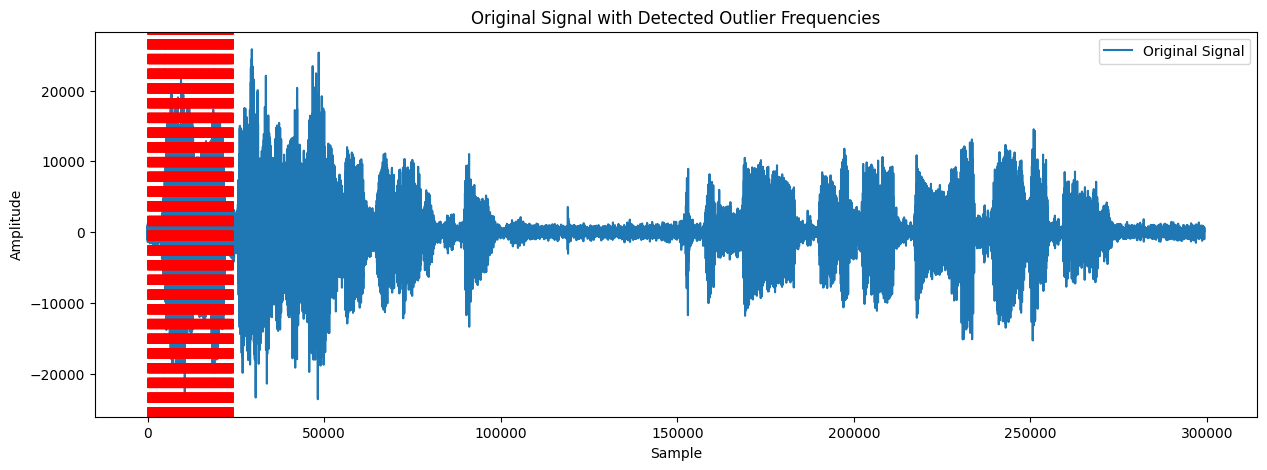

In [ ]:
def plot_anomalies(audio_file, outlier_frequencies):
    # Load audio data
    sample_rate, audio_data = wavfile.read(audio_file)

    # Compute analytic signal using Hilbert transform
    analytic_signal = hilbert(audio_data)

    # Extract the envelope (amplitude) of the analytic signal
    envelope = np.abs(analytic_signal)

    # Plot the original signal
    plt.figure(figsize=(15, 5))
    plt.plot(audio_data, label='Original Signal')

    # Highlight the detected outlier frequencies
    for freq in outlier_frequencies:
        plt.axvline(x=freq, color='red', linestyle='--', linewidth=2)

    plt.title('Original Signal with Detected Outlier Frequencies')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

audio_file = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav'
plot_anomalies(audio_file, outlier_frequencies[0])

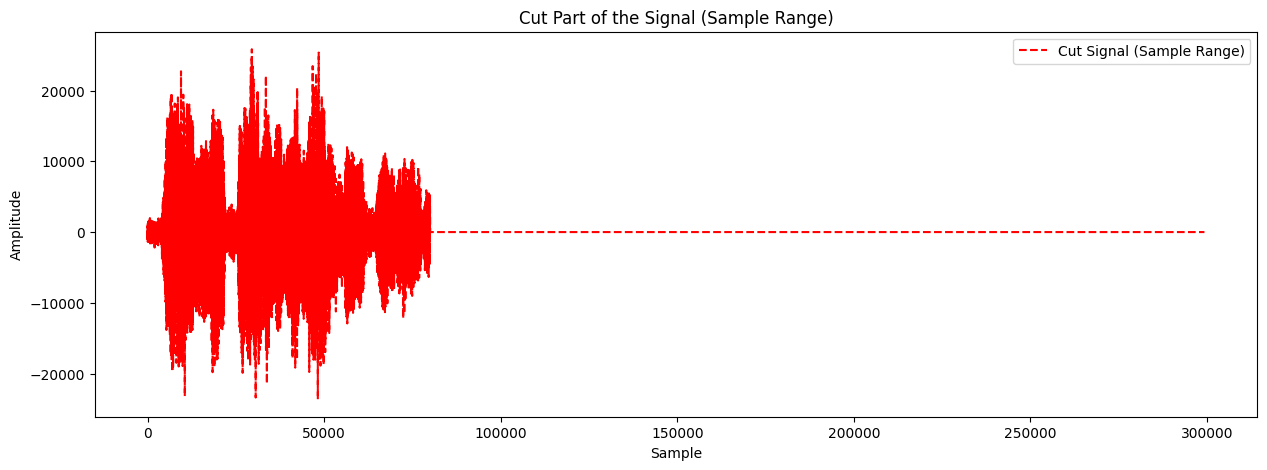

In [ ]:
from scipy.io import wavfile
import IPython.display as ipd

def cut_sample_range(audio_data, sample_range):
    # Create a mask to exclude the specified sample range
    mask = np.ones_like(audio_data)

    # Apply the mask to the specified sample range
    mask[sample_range[0]:sample_range[1]] = 0

    # Apply the mask to the audio data
    cut_audio = audio_data * mask

    return cut_audio

audio_file = '/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav'
sample_rate, audio_data = wavfile.read(audio_file)

# sample range to cut
sample_range_to_cut = (80000, 300000)
cut_audio_sample_range = cut_sample_range(audio_data, sample_range_to_cut)

# Plot the cut sample range
plt.figure(figsize=(15, 5))
plt.plot(cut_audio_sample_range, label='Cut Signal (Sample Range)', linestyle='--', color='red')
plt.title('Cut Part of the Signal (Sample Range)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import IPython.display as ipd

def amplitude_demodulation(audio_data, carrier_frequency, sample_rate):
    t = np.arange(len(audio_data)) / sample_rate
    carrier = np.cos(2 * np.pi * carrier_frequency * t)
    mixed_signal = audio_data * carrier

    # Demodulation (you may replace this with a more sophisticated method)
    demodulated_signal = mixed_signal

    return demodulated_signal

def extract_secret_code(audio_data, cutoff_frequency, sample_rate):
    # Design a low-pass Butterworth filter
    order = 8  # Filter order
    b, a = butter(order, cutoff_frequency, btype='low', fs=sample_rate, output='ba')

    # Apply the low-pass filter to the audio data
    filtered_secret_code = lfilter(b, a, audio_data)

    return filtered_secret_code

# Example usage
sample_rate, audio_data = wavfile.read("/content/drive/MyDrive/ISP/Ex3_files/Ex3_sound4.wav")
carrier_frequency = 19000
cutoff_frequency = 5000  # Adjust this to set the cutoff frequency of the low-pass filter

sample_range_to_cut = (80000, 300000)

# Cut the sample range
cut_audio_sample_range = cut_sample_range(audio_data, sample_range_to_cut)

# Amplitude demodulation
demodulated_signal = amplitude_demodulation(cut_audio_sample_range, carrier_frequency, sample_rate)

# Extract and filter secret code
filtered_secret_code = extract_secret_code(demodulated_signal, cutoff_frequency, sample_rate)

# Play the filtered secret code
ipd.Audio(filtered_secret_code.astype(np.int16), rate=sample_rate)